## Jobsheet 3

*   Nama : Muhammad Ainur Riziq
*   Absen : 19
*   Kelas : TI 3E

<br>

### Praktikum 1

#### Langkah 1: Persiapan Data
    Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.


Langkah 2: Import Library








In [4]:
# import package
import numpy as np
import pandas as pd

Import library NumPy dan Pandas yang digunakan untuk manipulasi data.

#### Langkah 3: Baca Data

In [5]:
# baca data dari file CSV
data = pd.read_csv('data/dataset.csv')

Baca data dari file CSV dengan menggunakan Pandas.

#### Langkah 4: Pemahaman Terhadap Data

In [6]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


menampilkan 5 data awal menggunakan data.head() , ukuran data menggunakan data.shape, informasi data menggunakan data.info(), dan deskripsi menggunakan data.describe()



#### Langkah 5: Visualisasi Data

In [7]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

Import library Matplotlib dan Seaborn untuk visualisasi data.



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


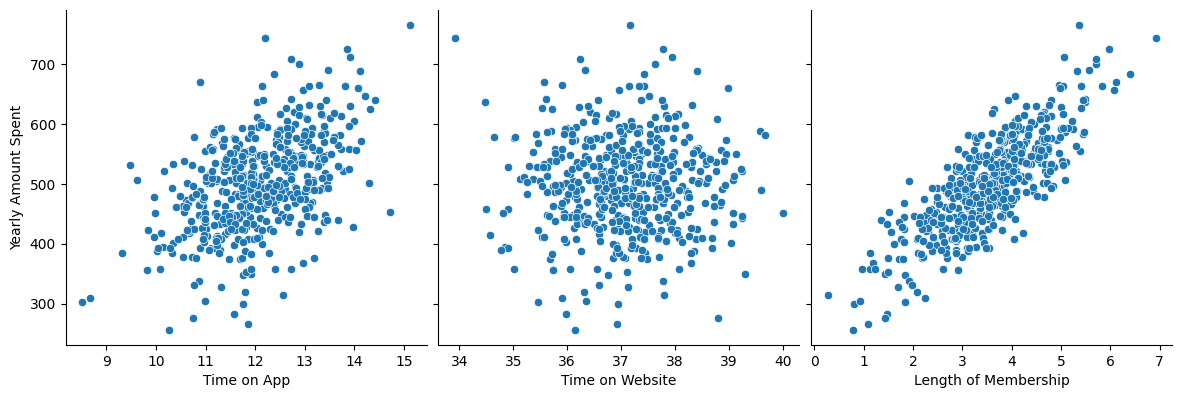

In [8]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

sns.pairplot membuat scatter plot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

x_vars: Kolom-kolom variabel bebas
y_vars: Kolom target.
size=4: Ukuran plot.
aspect=1: Rasio aspek plot 1:1
kind='scatter': Menghasilkan scatter plot untuk tiap pasangan variabel.


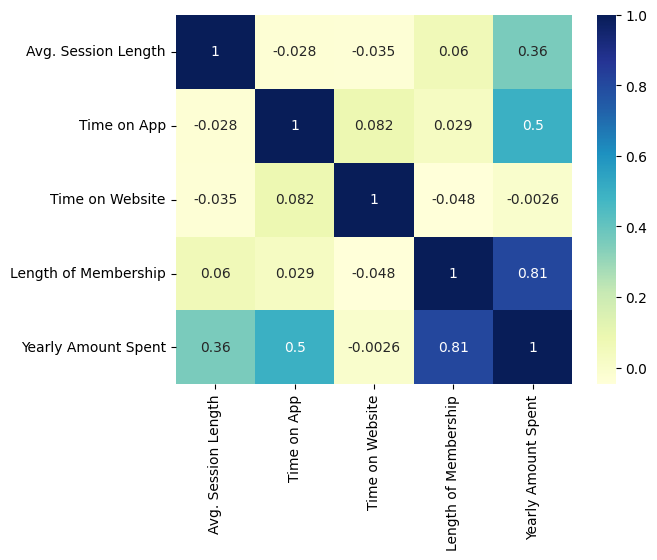

In [9]:
# visualisasi korelasi dengan heatmap
numerical_data = data.select_dtypes(include=[np.number])
sns.heatmap(numerical_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

* numerical_data = data.select_dtypes(include=[np.number]):
 Memilih kolom-kolom yang bertipe data numerik dari DataFrame data.
* sns.heatmap(numerical_data.corr(), cmap="YlGnBu", annot=True):
  * numerical_data.corr(): Menghitung matriks korelasi dari DataFrame numerical_data.
  * sns.heatmap(..., cmap="YlGnBu", annot=True): Menggunakan seaborn.heatmap untuk membuat heatmap dari matriks korelasi.
  * cmap="YlGnBu": Menentukan colormap (skema warna) untuk heatmap.
  * annot=True: Menampilkan nilai korelasi di setiap sel heatmap.

#### Langkah 6: Regresi Linier



In [10]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

Membuat variabel bebas (X) dari kolom 'lenght of membership' dan variabel target (y) dari kolom 'yearly amount spent'



In [11]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

*  Mengimpor fungsi train_test_split untuk membagi dataset
* membagi data menjadi data latih (70%) dan data uji (30%) menggunakan
train_test_split.

In [12]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

* Mengimpor library **statsmodels** untuk membangun model statistik
* **X_train_sm = sm.add_constant(X_train)**: Menambahkan kolom konstanta / intercept ke data input X_train. add_constant() menambahkan kolom yang isinya 1 ke setiap baris dalam X_train.

* **lr = sm.OLS(y_train, X_train_sm).fit()**:
  - Membuat model regresi linier menggunakan metode **Ordinary Least Squares**
  - sm.OLS(y_train, X_train_sm): Membuat model OLS dengan data latih (X_train_sm sebagai input dan y_train sebagai target).
  - .fit(): Melakukan fitting atau pelatihan model berdasarkan data yang diberikan.



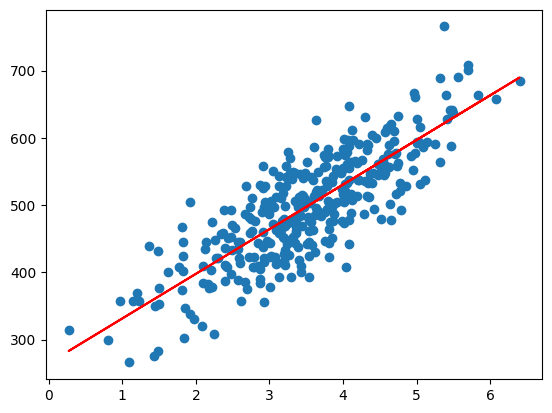

In [13]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

* plt.scatter(X_train, y_train): Membuat scatter plot dari data latih (X_train, y_train) untuk menampilkan titik-titik data sebenarnya.
* plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r'):Membuat garis regresi linier berdasarkan persamaan regresi
'r' menunjukkan warna garis merah (r for red).
plt.show():

Menampilkan plot scatter dan garis regresi di satu grafik.

Langkah 7: Analisis Residual


In [14]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

* y_train_pred = lr.predict(X_train_sm):Kode ini menggunakan model regresi linier yang telah dilatih (lr) untuk memprediksi nilai y pada data latih (X_train_sm), yang telah ditambahkan konstanta.

* res = (y_train - y_train_pred):Menghitung residual (selisih antara nilai aktual y_train dan nilai prediksi y_train_pred).



<ipython-input-15-d336bf8b039e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


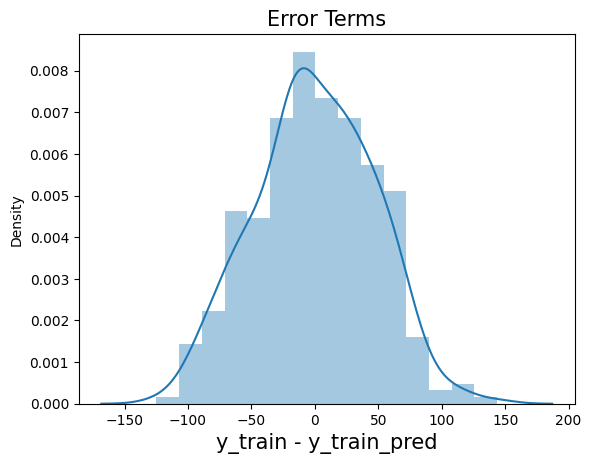

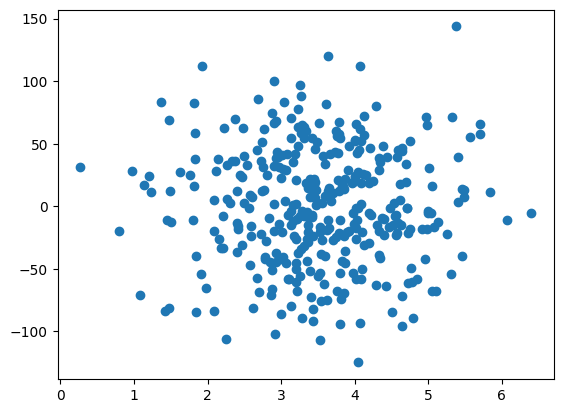

In [15]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

* fig = plt.figure(): Membuat objek figur baru untuk visualisasi.
* sns.distplot(res, bins=15):Membuat histogram untuk menampilkan distribusi residual (res).
  * Fungsi distplot() untuk menggambar histogram beserta density curve. dan bins=15 menentukan jumlah "kotak" pada histogram untuk membagi data residual.
* plt.title('Error Terms', fontsize=15): Memberikan judul pada plot, yaitu "Error Terms", dengan ukuran font 15.
* plt.xlabel('y_train - y_train_pred', fontsize=15): Menambahkan label pada sumbu x untuk menunjukkan bahwa ini adalah selisih antara nilai sebenarnya (y_train) dan nilai prediksi (y_train_pred).
* plt.show(): Menampilkan histogram residual.
Tujuan: Histogram ini digunakan untuk melihat distribusi error (residual). Dalam regresi linier, error seharusnya berdistribusi normal di sekitar 0.

plt.scatter(X_train, res): Membuat scatter plot antara X_train dan res untuk melihat pola residual terhadap input (variabel independen).


#### Langkah 8: Prediksi pada Data Uji dan Evaluasi Model

In [16]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

* X_test_sm = sm.add_constant(X_test) Menambahkan kolom konstanta (intercept) pada data uji X_test agar model regresi bisa menggunakan intercept dalam prediksi.
* y_test_pred = lr.predict(X_test_sm): Menggunakan model regresi linier yang telah dilatih (lr) untuk memprediksi nilai y berdasarkan data uji (X_test_sm).



In [17]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

* from sklearn.metrics import r2_score: Mengimpor fungsi r2_score dari library scikit-learn untuk menghitung R-squared

* r2_score(y_test, y_test_pred) menghitung nilai R-squared berdasarkan data aktual (y_test) dan nilai prediksi (y_test_pred).

#### Langkah 9: Visualisasi Hasil


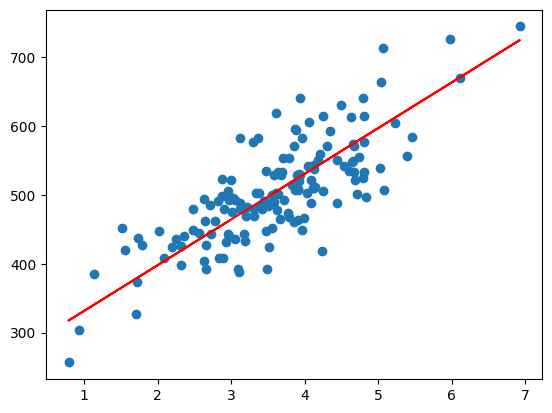

In [18]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

* plt.scatter(X_test, y_test): Membuat scatter plot dari data uji (X_test, y_test). Ini menampilkan titik-titik aktual dari variabel input (X_test) dan variabel output (y_test).
* plt.plot(X_test, y_test_pred, 'r'): Membuat garis prediksi menggunakan nilai prediksi yang dihasilkan oleh model (y_test_pred). Garis ini menunjukkan hasil prediksi model regresi berdasarkan data uji. 'r' menunjukkan bahwa garis ini berwarna merah.
* plt.show(): Menampilkan kombinasi scatter plot dari data aktual dan garis prediksi model regresi.

Dengan mengikuti langkah-langkah di atas, Anda dapat melakukan analisis regresi linier pada data Anda, mengukur kinerja model, dan memvisualisasikan hasilnya.

### Praktikum 2

1. Mengimpor Library:



In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mengimport NumPy untuk komputasi numerik, Matplotlib untuk visualisasi data.
dan Pandas untuk manipulasi data.

2. Mengimpor Dataset:



In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('data/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

* Mengimpor dataset dari file CSV bernama 'Posisi_gaji.csv'
* X = dataset.iloc[:, 1:2].values: Mengambil data dari kolom kedua (indeks 1) pada DataFrame dataset menggunakan .iloc (index-based selection).
1:2 memastikan bahwa hasilnya adalah array 2D
.values mengonversi hasilnya dari DataFrame ke dalam NumPy array.
* y = dataset.iloc[:, 2].values: Mengambil data dari kolom ketiga (indeks 2) dari DataFrame dataset, yang merupakan target atau variabel dependen (y), dan mengonversinya ke dalam NumPy array. Di sini, y hanya berupa array 1D

3. Feature Scaling:



In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

* from sklearn.preprocessing import StandardScaler: Mengimpor StandardScaler dari scikit-learn, yang digunakan untuk melakukan feature scaling.
* sc_X = StandardScaler() dan sc_y = StandardScaler(): Membuat objek scaler untuk fitur input (X) dan target/output (y).
* X = sc_X.fit_transform(X.reshape(-1, 1)): Melakukan scaling
  * X.reshape(-1, 1): Mengubah array X menjadi bentuk 2D dengan satu kolom. -1 berarti jumlah baris akan disesuaikan secara otomatis berdasarkan data
  * sc_X.fit_transform(X):

* y = sc_y.fit_transform(y.reshape(-1, 1)): Proses yang sama seperti pada X, tetapi diterapkan pada target.

4. Fitting SVR ke Dataset:



In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

* from sklearn.svm import SVR: Mengimpor SVR dari scikit-learn untuk memprediksi nilai kontinu.
* regressor = SVR(kernel='rbf'): Membuat objek SVR dengan parameter kernel='rbf'. kernel='rbf' adalah jenis kernel yang umum digunakan dalam SVR yang membantu dalam menangani hubungan non-linier antara fitur dan target.
* regressor.fit(X, y): Melatih (fitting) model SVR menggunakan data yang telah diskalakan (X dan y).

5. Visualisasi Hasil SVR:



<ipython-input-20-16b49e598bbf>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


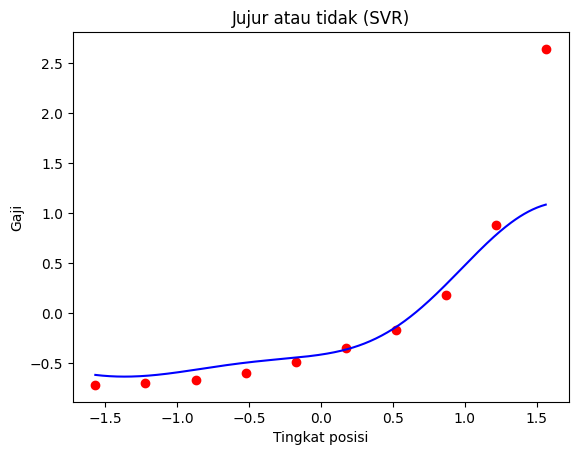

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

* X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1):

* np.arange(min(X), max(X), 0.01): Membuat array X_grid yang mencakup rentang nilai dari min(X) hingga max(X) dengan langkah 0.01. Ini menghasilkan array dengan resolusi tinggi untuk mendapatkan kurva yang lebih halus.
* reshape(-1, 1): Mengubah array 1D menjadi array 2D dengan satu kolom, sesuai dengan format yang dibutuhkan oleh model SVR untuk prediksi.
* plt.scatter(X, y, color='red'): Membuat scatter plot dari data asli (X, y) dengan titik berwarna merah.
* plt.plot(X_grid, regressor.predict(X_grid), color='blue'): Menggunakan model SVR (regressor) untuk memprediksi nilai target berdasarkan X_grid. Hasil prediksi digambarkan sebagai kurva biru.
* plt.title('Jujur atau tidak (SVR)'): Memberikan judul pada plot.
* plt.xlabel('Tingkat posisi') dan plt.ylabel('Gaji'):Menambahkan label pada sumbu x dan y.
* plt.show():Menampilkan plot hasil visualisasi.

6. Prediksi Hasil:



In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

* tingkat_posisi_prediksi = np.array([[6.5]]): Membuat array 2D dengan nilai 6.5 yang akan diprediksi. Array ini berbentuk 2D (dengan satu kolom), sesuai dengan format yang diharapkan oleh model SVR.
* tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi): Menerapkan scaling pada data prediksi tingkat_posisi_prediksi menggunakan scaler yang sama pada data pelatihan.
* gaji_prediksi = regressor.predict(tingkat_posisi_prediksi): Menggunakan model SVR (regressor) untuk memprediksi nilai gaji berdasarkan tingkat_posisi_prediksi yang telah diskalakan.
* gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1)): Mengembalikan gaji_prediksi dari skala diskalakan ke skala asli menggunakan inverse_transform dari scaler sc_y.
* .reshape(-1, 1) mengubah gaji_prediksi menjadi array 2D

7. Menampilkan Hasil:



In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


menampilkan hasil prediksi gaji berdasarkan tingkat posisi 6.5.
* gaji_prediksi[0]: Mengakses elemen pertama dari array gaji_prediksi. Karena gaji_prediksi adalah array 2D setelah inverse_transform, kita perlu mengakses elemen pertama untuk mendapatkan nilai prediksi gaji.

8. Validasi Hasil:

 `Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]`

9. Evaluasi Model SVR



In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


* from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score:
Mengimpor fungsi-fungsi evaluasi dari scikit-learn untuk menghitung Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared.
* y_actual = y: Mengasumsikan bahwa y adalah target sebenarnya untuk data pelatihan.
* y_pred = regressor.predict(X): Menggunakan model SVR (regressor) untuk memprediksi nilai y berdasarkan data fitur X.
* mae = mean_absolute_error(y_actual, y_pred): Menghitung Mean Absolute Error (MAE), yang merupakan rata-rata dari selisih absolut antara nilai aktual dan nilai prediksi.
* mse = mean_squared_error(y_actual, y_pred): Menghitung Mean Squared Error (MSE), yang merupakan rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi.
* rmse = np.sqrt(mse): Menghitung Root Mean Squared Error (RMSE), yaitu akar kuadrat dari MSE.
* r2 = r2_score(y_actual, y_pred): Menghitung R-squared (koefisien determinasi), yang menunjukkan seberapa baik model menjelaskan variabilitas dalam data target.
* print("MAE:", mae):Menampilkan MAE.
* print("MSE:", mse):Menampilkan MSE.
* print("RMSE:", rmse):Menampilkan RMSE.
* print("R-squared:", r2):Menampilkan R-squared.

### Tugas Praktikum


#### Tugas 1: Multiple Linear Regression
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


visualisasi data dengan pairplot

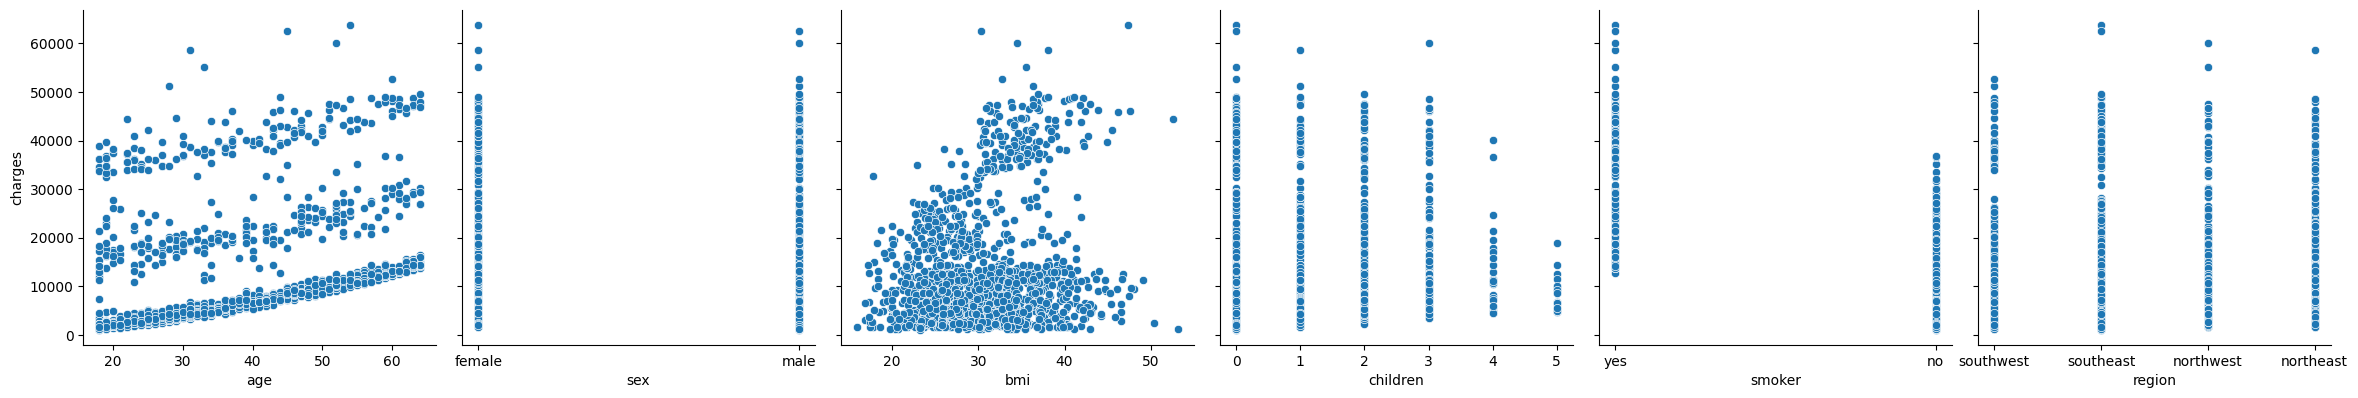

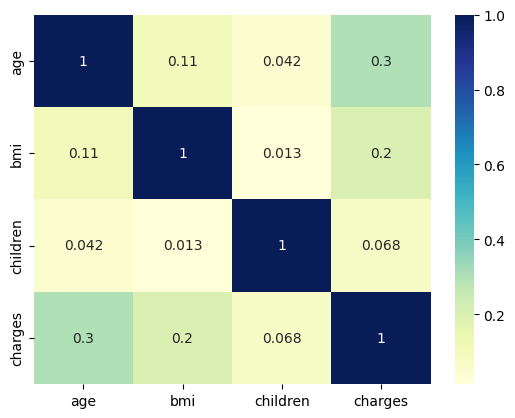

In [23]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

numerical_data = data.select_dtypes(include=[np.number])
sns.heatmap(numerical_data.corr(), cmap="YlGnBu", annot=True)
plt.show()


1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [24]:
# x variabel independen , y variabel dependen
X = data[['age', 'bmi', 'children']]
y = data['charges']

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.



In [25]:
# membagi data train dan test rasio 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

3. Lakukan feature scaling jika diperlukan


In [26]:
scl = StandardScaler()
X_train_scaled = scl.fit_transform(X_train)
X_test_scaled = scl.transform(X_test)

4. Buat model multiple linear regression menggunakan Scikit-Learn
5. Latih model pada data latih dan lakukan prediksi pada data uji



In [27]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

R-squared: 0.07091124032821483
MSE: 145688625.2346241
MAE: 9336.545180644136


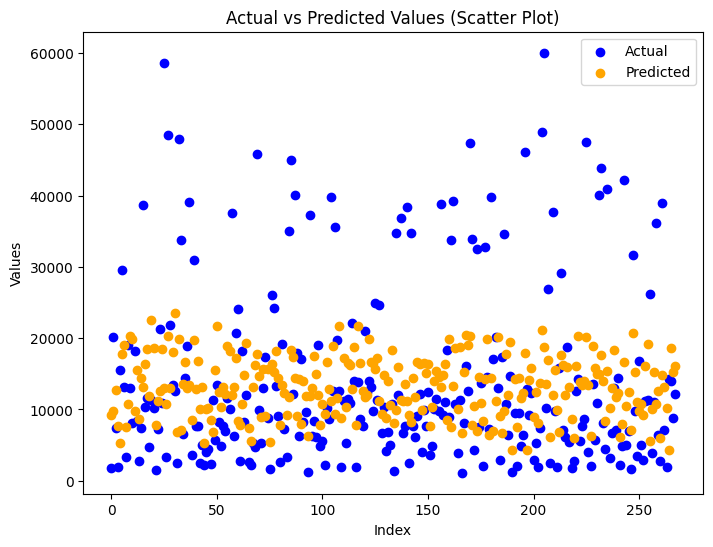

In [35]:
# Menghitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'R-squared: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

# Scatter plot untuk Regresi Linier dengan warna berbeda untuk actual dan predicted
plt.figure(figsize=(8,6))

# Actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Predicted values
plt.scatter(range(len(y_pred)), y_pred, color='orange', label='Predicted')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values (Scatter Plot)')
plt.legend()
plt.show()
